In [2]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("healthcare.csv")

In [4]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.shape

(5110, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [16]:
data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

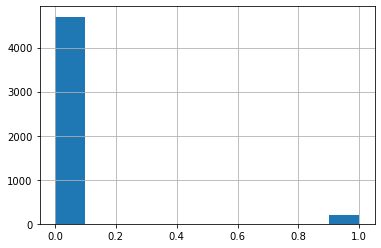

In [17]:
data.stroke.hist()

In [18]:
non_str = data[data['stroke']==0]
non_str.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0


In [24]:
n_stroke_samples = non_str.sample(209)

In [25]:
strokes = data[data['stroke']==1]


In [27]:
strokes.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [28]:
df = pd.concat([strokes,n_stroke_samples], axis=0)


In [31]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2859,51746,Female,37.0,0,0,Yes,Govt_job,Rural,67.07,27.4,never smoked,0
1193,70678,Female,55.0,0,1,No,Private,Rural,109.69,22.2,smokes,0
970,10538,Male,75.0,1,1,Yes,Self-employed,Urban,195.03,28.7,formerly smoked,0
851,14147,Male,49.0,0,0,Yes,Private,Urban,186.32,43.8,smokes,0


In [29]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [30]:
df['stroke'].value_counts()

1    209
0    209
Name: stroke, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

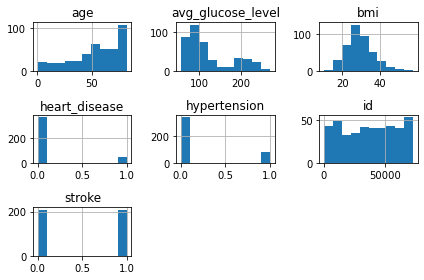

In [32]:
df.hist()
plt.tight_layout()
plt.show

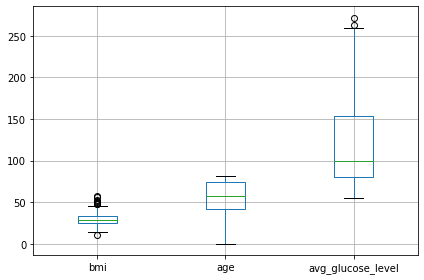

In [35]:
df.boxplot(column=['bmi','age','avg_glucose_level'])
plt.tight_layout()
plt.show()

In [40]:
g = df.groupby(['gender'])['stroke'].value_counts()


In [41]:
g

gender  stroke
Female  0         132
        1         120
Male    1          89
        0          77
Name: stroke, dtype: int64

In [42]:

df2 = df[['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',\
               'avg_glucose_level','bmi', 'smoking_status','stroke']]


In [44]:
df2.head(5)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [45]:
n_s = df2[df2['stroke']==0]


In [46]:
n_s.head(5)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1686,15.0,0,0,No,children,Urban,87.96,21.5,formerly smoked,0
4795,62.0,0,0,Yes,Self-employed,Rural,136.18,32.2,Unknown,0
2802,57.0,0,0,Yes,Private,Urban,59.85,41.5,never smoked,0
4323,15.0,0,0,No,children,Rural,78.90,23.0,Unknown,0
493,23.0,0,0,No,Private,Rural,69.24,51.0,never smoked,0


In [ ]:
n_s_1

In [47]:
df_cause = df2.loc[:,['age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi', 'stroke']]

In [48]:
df_cause

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
2859,37.0,0,0,67.07,27.4,0
1193,55.0,0,1,109.69,22.2,0
970,75.0,1,1,195.03,28.7,0
851,49.0,0,0,186.32,43.8,0


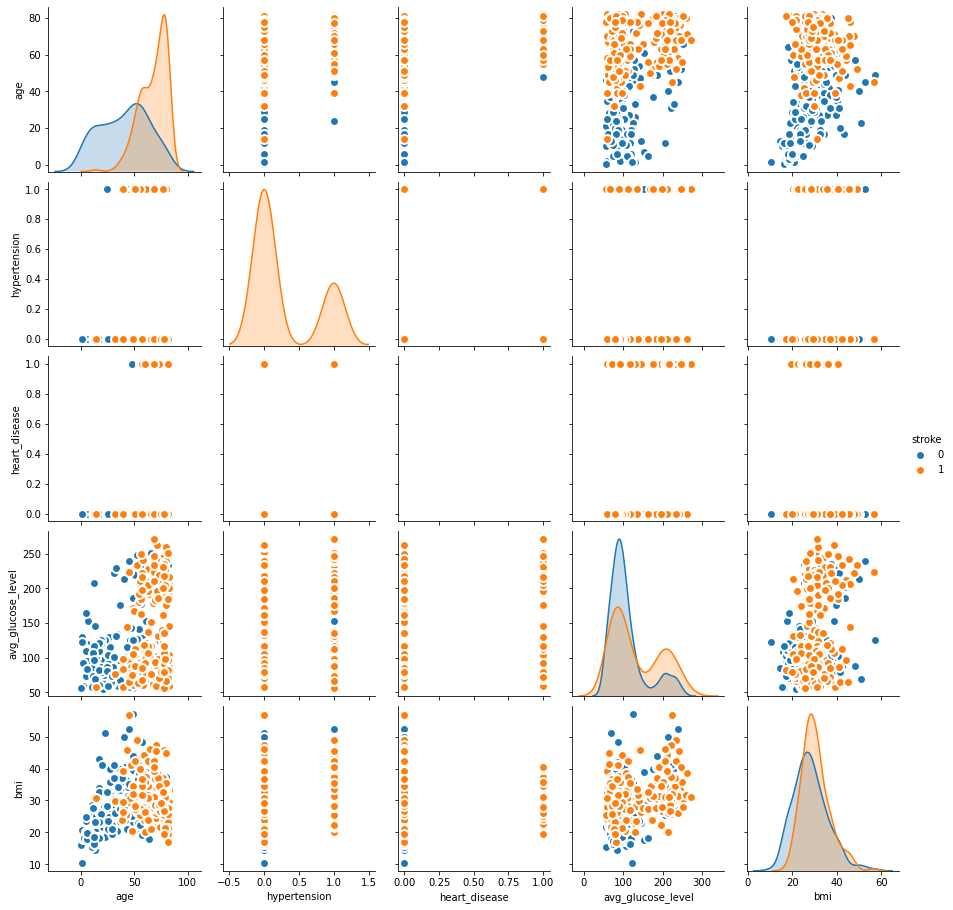

In [52]:
sns.pairplot(df_cause, kind="scatter", hue="stroke", plot_kws=dict(s=80,edgecolor="white", linewidth=2))
plt.show()

In [57]:
# convert catergorical data to numerical data

lb_maker = LabelEncoder()

df2["ever_married"] = lb_maker.fit_transform(df2["ever_married"])
df2["work_type"] = lb_maker.fit_transform(df2["work_type"])
df2["Residence_type"] = lb_maker.fit_transform(df2["Residence_type"])
df2["smoking_status"] = lb_maker.fit_transform(df2["smoking_status"])

In [58]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [60]:
X = df2.drop(['stroke'], axis=1)
y = df2['stroke']

In [62]:
X.head(5)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,1,2,1,228.69,36.6,1
2,80.0,0,1,1,2,0,105.92,32.5,2
3,49.0,0,0,1,2,1,171.23,34.4,3
4,79.0,1,0,1,3,0,174.12,24.0,2
5,81.0,0,0,1,2,1,186.21,29.0,1


In [63]:
y.head(5)

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=100)

In [102]:
log_model = LogisticRegression()

In [103]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [105]:
log_model.score(X_test,y_test)

0.7101449275362319

In [85]:
lg_pred = log_model.predict(X_test)

In [86]:
lg_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

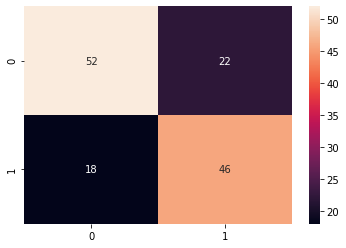

In [87]:
log_cm= confusion_matrix(y_test, lg_pred)
sns.heatmap(log_cm, annot=True, fmt='d')

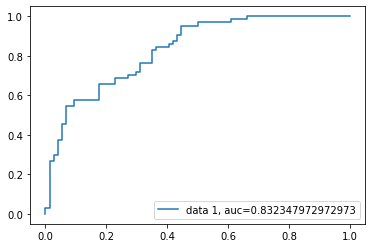

In [89]:
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [106]:
random_forest = RandomForestClassifier(n_estimators=100)

In [107]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [108]:
random_predict = random_forest.predict(X_test)

In [109]:
metrics.accuracy_score(y_test, random_predict)

0.717391304347826

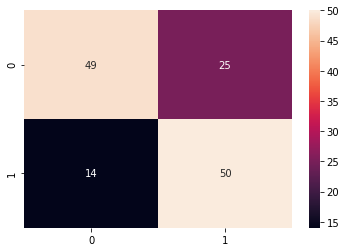

In [110]:
rf_cm = confusion_matrix(y_test, random_predict)
sns.heatmap(rf_cm, annot = True, fmt = 'd')

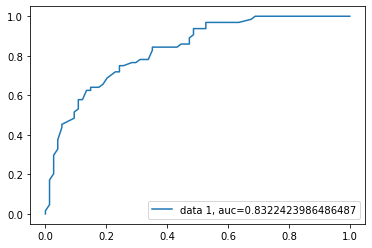

In [97]:
y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [98]:

features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',\
               'avg_glucose_level','bmi', 'smoking_status']

In [100]:

feature_imp = pd.Series(random_forest.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

age                  0.402101
bmi                  0.189036
avg_glucose_level    0.169287
work_type            0.062647
smoking_status       0.052008
ever_married         0.039871
hypertension         0.031096
heart_disease        0.029364
Residence_type       0.024591
dtype: float64

No handles with labels found to put in legend.


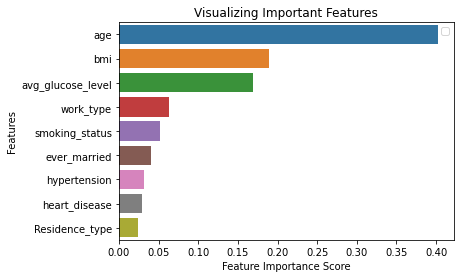

In [101]:

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [111]:
# naive Bayes is useful for medical data 

In [112]:
nb_model = GaussianNB()

In [113]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [114]:
nb_pred = nb_model.predict(X_test)

In [115]:
accuracy_score(y_test, nb_pred)

0.7463768115942029

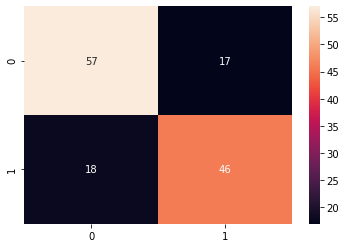

In [116]:
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cm, annot = True, fmt = 'd')

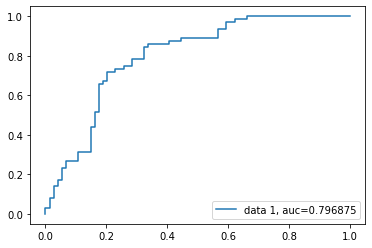

In [117]:
y_pred_proba = nb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()